In [3]:
# import libraries
from google.colab import drive
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [4]:
# Mount Google Drive
drive.mount('/content/drive')
image_path = '/content/drive/My Drive/parrot.png'

Mounted at /content/drive


In [5]:
# filter vector representation
F = np.array([1, 1, 1, 0, 0, 0, -1, -1, -1])
flat = F.flatten()

In [6]:
# neighborhood patch vector representation
ipatch = np.array([
    [0, 0, 0, 0, 0],
    [0, 7, 4, 1, 0],
    [0, 8, 5, 2, 0],
    [0, 9, 6, 3, 0],
    [0, 0, 0, 0, 0]
])

In [7]:
# matrix initialization
corrmatrix = np.zeros((3, 3))

In [8]:
# calculate the dot product
for i in range(1, 4):
    for j in range(1, 4):
        neighborpatch = ipatch[i - 1:i + 2, j - 1:j + 2]
        corrmatrix[i - 1, j - 1] = np.dot(flat, neighborpatch.flatten())

In [9]:
# print the correlation matrix
print("Correlation matrix:")
print(corrmatrix)

Correlation matrix:
[[-13. -15.  -7.]
 [ -4.  -6.  -4.]
 [ 13.  15.   7.]]


In [10]:
# Test the code using the provided image “parrot.png” and the filters in problem 1
def image_dot_product(F, I):
    padded_I = np.pad(I, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    f = F.flatten()
    patches = np.lib.stride_tricks.sliding_window_view(padded_I, (3, 3))
    patches_1d = patches.reshape(-1, 9)
    G = np.dot(patches_1d, f)
    G = G.reshape(I.shape)
    return G

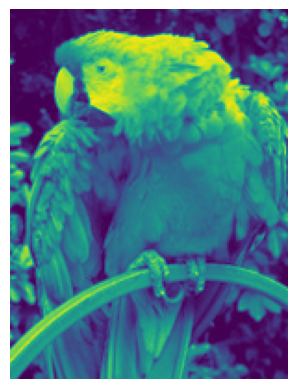

In [11]:
# Load the image
image = io.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
# Define filters
a = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
b = np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
c = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
d = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
e = (1/16) * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
f = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

In [13]:
# dot products
result_a = image_dot_product(a, image)
result_b = image_dot_product(b, image)
result_c = image_dot_product(c, image)
result_d = image_dot_product(d, image)
result_e = image_dot_product(e, image)
result_f = image_dot_product(f, image)

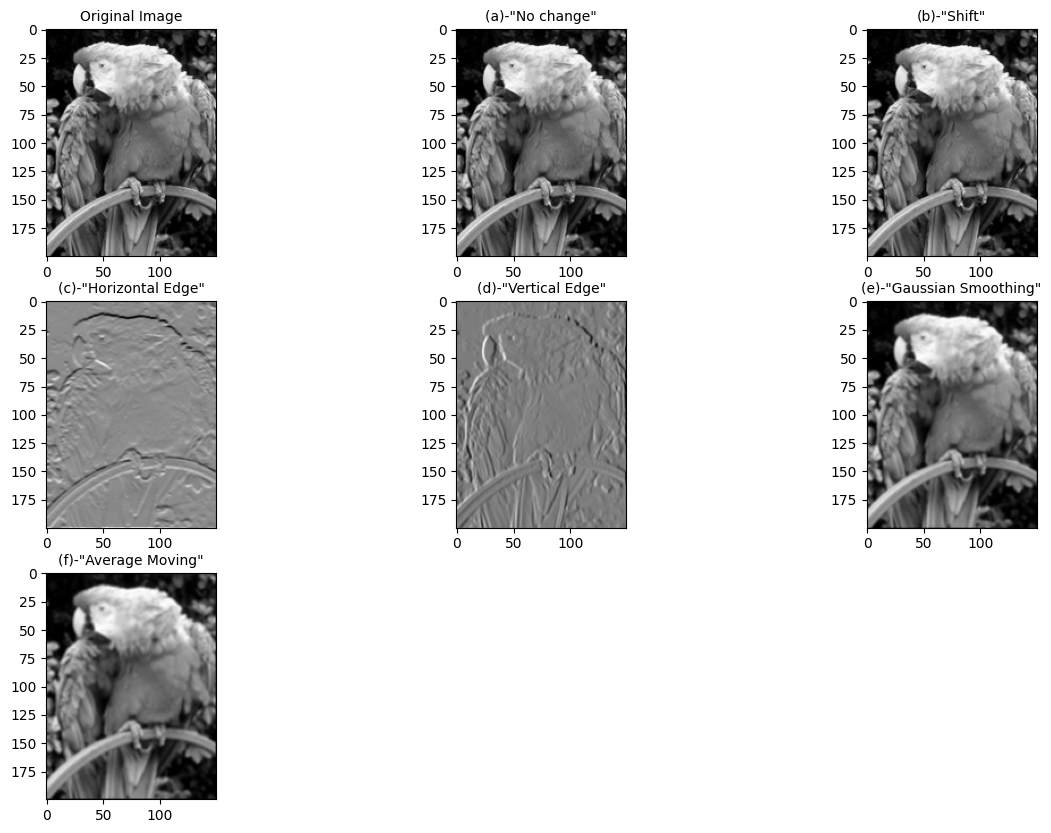

In [14]:
# plotting
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize = 10)

plt.subplot(3, 3, 2)
plt.imshow(result_a, cmap='gray')
plt.title('(a)-"No change"', fontsize = 10)

plt.subplot(3, 3, 3)
plt.imshow(result_b, cmap='gray')
plt.title('(b)-"Shift"', fontsize = 10)

plt.subplot(3, 3, 4)
plt.imshow(result_c, cmap='gray')
plt.title('(c)-"Horizontal Edge"', fontsize = 10)

plt.subplot(3, 3, 5)
plt.imshow(result_d, cmap='gray')
plt.title('(d)-"Vertical Edge"', fontsize = 10)

plt.subplot(3, 3, 6)
plt.imshow(result_e, cmap='gray')
plt.title('(e)-"Gaussian Smoothing"', fontsize = 10)

plt.subplot(3, 3, 7)
plt.imshow(result_f, cmap='gray')
plt.title('(f)-"Average Moving"', fontsize = 10)

plt.show()

In [15]:
# Unmount Google Drive
drive.flush_and_unmount()